# 1. Agglomerative Clustering的原理是将小类聚合成大类

T(Week15内容)

# 2. K-Means算是一种Agglomerative Clustering

F(Week15内容)

# 3. 用Gaussian Mixture Models的时候必须确定想要用的components的数字

T吧（Week15）,主要是不知道他说的components是啥，应该是类的数量

> 对的

# 4. 有以下几个点，要聚类

`{(1, 2), (1,3), (1, 4), (2,3), (3,5), (2,4), (4, 5), (3, 6)}`

聚成两类，初始化质心为`（0，6），（4，2）`

 - 在第一次迭代之后，新质心都是啥？（精确到三位小数）
 - 几代收敛？
 - 每个类里几个点？

In [1]:

# 首先从Week15的程序里找来我的手动KMeans
import random
import numpy as np


def kmeans(k, X):
    # randomly assign labels to the data
    labels = []
    for _ in range(len(X)):
        labels.append(random.randint(0, k-1))

    # set up a while loop that will run until the data labels no longer change
    while True:
        # Calculate the centroids of the data
        centroids = []
        for label in np.unique(labels):
            count = 0
            current_centroid = np.zeros(np.shape(X[0]))
            for _ in range(len(labels)):
                if labels[_] == label:
                    count += 1
                    current_centroid += X[_]

            current_centroid = current_centroid/count
            current_centroid = np.ndarray.tolist(current_centroid)
            centroids.append(current_centroid)
        
        # 根据与质心的距离重新分配label
        rearranged_labels = []
        # For each datapoint:
        for i, x in enumerate(X):  # i:元素标号 x:元素
            # Calculate the squared Euclidean distance to each centroid
            distances = []
            for centroid in centroids:
                distance = np.linalg.norm(x-centroid)
                distances.append(distance)
            # Assign new labels based on distance to the centroid
            rearranged_labels.append(np.argmin(distances))
            # If all the new labels are equal to the old labels,
            # break out of the while loop
        if labels == rearranged_labels:
            break
        # Assign the values of the new labels to the variable labels
        labels = rearranged_labels
        # return the centres and the labels.
    centroids = np.array(centroids)
    return centroids, labels

In [19]:
 # 在上述基础上进行小修改：

 def KMeansSolver(k,X):
    # randomly assign labels to the data
    labels = []
    for _ in range(len(X)):
        labels.append(random.randint(0, k-1))



    # 迭代计数器
    iter_counter = 1


    # set up a while loop that will run until the data labels no longer change
    while True:
        # Calculate the centroids of the data
        centroids = []
        for label in np.unique(labels):
            count = 0
            current_centroid = np.zeros(np.shape(X[0]))
            for _ in range(len(labels)):
                if labels[_] == label:
                    count += 1
                    current_centroid += X[_]

            current_centroid = current_centroid/count
            current_centroid = np.ndarray.tolist(current_centroid)
            centroids.append(current_centroid)
        

        # 对题目的特别更改：题目给出了第一代质心的值
        if iter_counter == 1:
            centroids = [[0,6],[4,2]]

        # 根据与质心的距离重新分配label
        rearranged_labels = []
        # For each datapoint:
        for i, x in enumerate(X):  # i:元素标号 x:元素
            # Calculate the squared Euclidean distance to each centroid
            distances = []
            for centroid in centroids:
                distance = np.linalg.norm(x-centroid)
                distances.append(distance)
            # Assign new labels based on distance to the centroid
            rearranged_labels.append(np.argmin(distances))
            # If all the new labels are equal to the old labels,
            # break out of the while loop

        # 输出本轮结果：

        print("^^^^^^^^^^^^^^^^^^^^")
        print("Current iter: "+str(iter_counter-1)) # 第一代相当于初始化了，不算一代
        print("Centroids: "+str(centroids))
        print("Current Labels:"+str(rearranged_labels))
        print("--------------------")
        iter_counter+=1

        # 如果和上一轮没有变化：停止
        if labels == rearranged_labels:
            break

        # Assign the values of the new labels to the variable labels
        labels = rearranged_labels

        # return the centres and the labels.
    centroids = np.array(centroids)

    return centroids, labels
    

In [20]:
# 代入数据

X = [[1, 2], [1,3], [1, 4], [2,3], [3,5], [2,4], [4, 5], [3, 6]]
X = np.array(X)

KMeansSolver(2,X)

^^^^^^^^^^^^^^^^^^^^
Current iter: 0
Centroids: [[0, 6], [4, 2]]
Current Labels:[1, 0, 0, 1, 0, 0, 1, 0]
--------------------
^^^^^^^^^^^^^^^^^^^^
Current iter: 1
Centroids: [[2.0, 4.4], [2.3333333333333335, 3.3333333333333335]]
Current Labels:[1, 1, 0, 1, 0, 0, 0, 0]
--------------------
^^^^^^^^^^^^^^^^^^^^
Current iter: 2
Centroids: [[2.6, 4.8], [1.3333333333333333, 2.6666666666666665]]
Current Labels:[1, 1, 1, 1, 0, 0, 0, 0]
--------------------
^^^^^^^^^^^^^^^^^^^^
Current iter: 3
Centroids: [[3.0, 5.0], [1.25, 3.0]]
Current Labels:[1, 1, 1, 1, 0, 1, 0, 0]
--------------------
^^^^^^^^^^^^^^^^^^^^
Current iter: 4
Centroids: [[3.3333333333333335, 5.333333333333333], [1.4, 3.2]]
Current Labels:[1, 1, 1, 1, 0, 1, 0, 0]
--------------------


(array([[3.33333333, 5.33333333],
        [1.4       , 3.2       ]]),
 [1, 1, 1, 1, 0, 1, 0, 0])

# 5. 决策树是受监督的学习

T（Week16）

# 6. 接下来的图表给出了一个数据集，你要建构一个决策树，来作为分类器

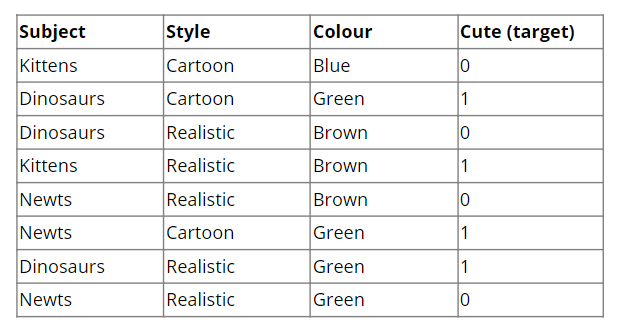

 - 叶子节点上，数据集的熵是多少？（三位小数）
 - 哪个问题适合放在第一个问？
 - 决策树多深？
 - 需要所有feature来正确分类图片吗？（T/F）

第一个问题：我猜是用香农熵

> 怎么衡量分类效果的高低？
>
> - 香农熵
>
> $\begin{equation} H(X) = -\sum\limits_{X}p(x)log(p(x)) \end{equation}$
>
> - 香农熵对于二元分类问题，可以简化为：
> $\begin{equation}B(q)=-(q log_{2}q+(1-q)log_{2}(1-q))\end{equation}$
>
> 如果数据集对于你的终极目标问题有`p`个pos数据，`n`个nega数据，那你的分类终极目标所需要的总熵为：
> $H(Goal) = B(\frac{p}{p+n})$


> 对的。对于叶子节点，其熵就是整个数据集的$H(Goal)$，对于这个数据集，p和n各占一半，所以是B（0.5）

In [22]:
import math

def B(q): # q = p/(p+n)
    return -(q*math.log2(q)+(1-q)*math.log2(1-q))

print(B(0.5))

1.0


In [23]:
# 这个集有8个点，四个p四个n
# 那么，香农熵应为：B(4/4+4) = B(0.5) = 1

第二个问题：首先问那个问题最好？

 - 如果用subject分：
   - Kittens：1p1n
   - Dino: 2p1n
   - Newts: 1p2n
 - 如果用Style分：
   - Cartoon：2p1n
   - Realistic: 2p2n
 - 如果用Colour分：
   - Blue：1n
   - Green：3p1n
   - Brown：1p2n

我觉得显然是颜色最好，但是数学证据我没想好是什么，information gain吧大概

第三个问题： 决策树多深？

 - 根据下方程序，我觉得应该是六层吧大概

In [29]:
# 导入数据

# Subjects： kitten = 0 Dino = 1 Newts = 2
# Style: C = 0 R = 1
# Color： Bl = 0 G = 1 Br = 2 

X = [[0,0,0],[1,0,1],[1,1,2],[0,1,2],[2,1,2],[2,0,1],[1,1,1],[2,1,1]]
Y = [0,1,0,1,0,1,1,0]



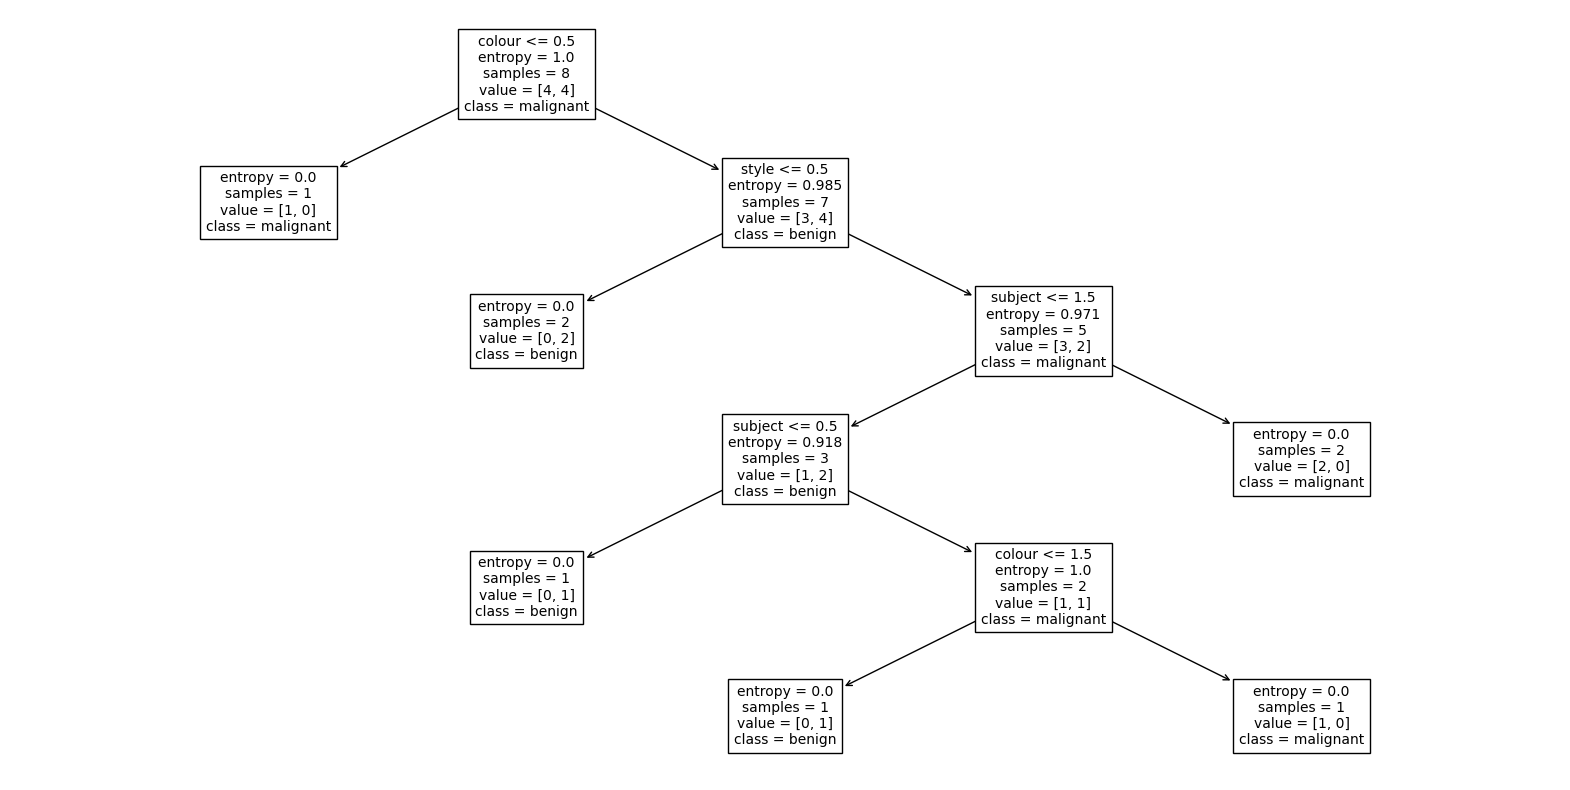

In [32]:
# 调库

from sklearn import tree


tr = tree.DecisionTreeClassifier(criterion="entropy")
model = tr.fit(X,Y)

# 可视化结果：
rcParams['figure.figsize'] = [20, 10]
classes=breast_cancer.target_names 
features = ['subject','style','colour']
tree.plot_tree(model,feature_names=features,class_names=classes,fontsize=10)
plt.show()


> 先照颜色分成三组：蓝绿褐
>  - 蓝色组直接就行了
>  - 褐色组还要再分一次（品种）
>  - 绿色组要再分两次
>
> 所以这里我的误区就是以为每个节点只有两个后续，显然是错的，所以上述的图不做数

第四个问题：需不需要所有feature来正确分类所有数据？

T吧，我感觉是这样。没看出哪个是多余的

> 根据问题三的分析，确实需要三个特征来分出绿色那组的class